In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/cuisine_rating.csv')

In [3]:
data.shape

(200, 15)

In [4]:
data.index

RangeIndex(start=0, stop=200, step=1)

In [5]:
data.columns

Index(['User ID', 'Area code', 'Location', 'Gender', 'YOB', 'Marital Status',
       'Activity', 'Budget', 'Cuisines', 'Alcohol ', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [7]:
data.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [8]:
data.duplicated().sum()

0

In [9]:
data.drop('User ID', axis=1, inplace=True)

In [10]:
data.head()

,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [11]:
data.isna().sum()

Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [12]:
df = data.copy()

In [13]:
data.rename(columns={"Activity":"Profession","Often A S":"Visited Often"},inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area code       200 non-null    int64  
 1   Location        200 non-null    object 
 2   Gender          200 non-null    object 
 3   YOB             200 non-null    int64  
 4   Marital Status  200 non-null    object 
 5   Profession      200 non-null    object 
 6   Budget          200 non-null    int64  
 7   Cuisines        200 non-null    object 
 8   Alcohol         200 non-null    object 
 9   Smoker          200 non-null    object 
 10  Food Rating     200 non-null    int64  
 11  Service Rating  200 non-null    int64  
 12  Overall Rating  200 non-null    float64
 13  Visited Often   200 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 22.0+ KB


In [15]:
def columns_value_count(df_count):
    for i in df_count.columns:
        print(f'{i}\n{df_count[i].value_counts()}\n')
        
columns_value_count(data)

Area code
Area code
123    24
129    17
153    15
107    15
154    14
       ..
120     1
199     1
102     1
106     1
160     1
Name: count, Length: 65, dtype: int64

Location
Location
St. George,NY         46
Upper East Side,NY    30
Riverdale,NY          28
Central Park,NY       24
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Central Park,ny        8
Market City, MY        2
Cedar Hill, NY         2
Name: count, dtype: int64

Gender
Gender
Male      118
Female     82
Name: count, dtype: int64

YOB
YOB
1974    12
2006    10
2000    10
2001     8
1998     8
1995     6
1977     6
2002     6
1969     6
2007     6
1956     6
2003     6
2009     6
1989     4
1976     4
2005     4
1981     4
1962     4
1964     4
1955     4
1996     4
1961     4
1985     4
1987     4
1975     4
1999     4
1988     4
1971     4
1959     4
1991     4
1965     4
1963     4
1990     2
1960     2
1978     2
1979     2
1994     2
1957     2
2004     2
1980     2
1997     2
1958    

In [16]:
data['Area code'].nunique()

65

In [17]:
data['Area code'].unique()

array([153, 123, 122, 129, 111, 107, 154, 117, 192, 137, 121, 198, 172,
       188, 166, 124, 131, 149, 101, 104, 140, 145, 159, 195, 105, 130,
       139, 113, 127, 134, 148, 158, 161, 167, 176, 110, 120, 142, 162,
       173, 184, 199, 102, 106, 157, 185, 147, 183, 138, 136, 169, 196,
       175, 135, 125, 186, 194, 182, 197, 179, 163, 178, 103, 170, 160],
      dtype=int64)

In [18]:
data.Location.unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Central Park,ny', 'Market City, MY',
       'Cedar Hill, NY'], dtype=object)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area code       200 non-null    int64  
 1   Location        200 non-null    object 
 2   Gender          200 non-null    object 
 3   YOB             200 non-null    int64  
 4   Marital Status  200 non-null    object 
 5   Profession      200 non-null    object 
 6   Budget          200 non-null    int64  
 7   Cuisines        200 non-null    object 
 8   Alcohol         200 non-null    object 
 9   Smoker          200 non-null    object 
 10  Food Rating     200 non-null    int64  
 11  Service Rating  200 non-null    int64  
 12  Overall Rating  200 non-null    float64
 13  Visited Often   200 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 22.0+ KB


In [20]:
data.rename(columns={"Alcohol ":"Alcohol"},inplace=True)

In [21]:
data.replace('Market City, MY','Market City, NY', inplace=True)

In [22]:
data.replace('Central Park,ny','Central Park,NY', inplace=True)

In [23]:
data.Location.unique()

array(['Upper East Side,NY', 'St. George,NY', 'Upper West Side,NY',
       'Central Park,NY', 'China Town, NY', 'Riverdale,NY',
       'Market City, NY', 'Cedar Hill, NY'], dtype=object)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area code       200 non-null    int64  
 1   Location        200 non-null    object 
 2   Gender          200 non-null    object 
 3   YOB             200 non-null    int64  
 4   Marital Status  200 non-null    object 
 5   Profession      200 non-null    object 
 6   Budget          200 non-null    int64  
 7   Cuisines        200 non-null    object 
 8   Alcohol         200 non-null    object 
 9   Smoker          200 non-null    object 
 10  Food Rating     200 non-null    int64  
 11  Service Rating  200 non-null    int64  
 12  Overall Rating  200 non-null    float64
 13  Visited Often   200 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 22.0+ KB


In [25]:
data[['Area','City']] = df.Location.str.split(',',expand=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area code       200 non-null    int64  
 1   Location        200 non-null    object 
 2   Gender          200 non-null    object 
 3   YOB             200 non-null    int64  
 4   Marital Status  200 non-null    object 
 5   Activity        200 non-null    object 
 6   Budget          200 non-null    int64  
 7   Cuisines        200 non-null    object 
 8   Alcohol         200 non-null    object 
 9   Smoker          200 non-null    object 
 10  Food Rating     200 non-null    int64  
 11  Service Rating  200 non-null    int64  
 12  Overall Rating  200 non-null    float64
 13  Often A S       200 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 22.0+ KB


In [27]:
data.head()

,Area code,Location,Gender,YOB,Marital Status,Profession,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited Often,Area,City
0,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,Upper East Side,NY
1,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,St. George,NY
2,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,Upper West Side,NY
3,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,Upper East Side,NY
4,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,Central Park,NY


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area code       200 non-null    int64  
 1   Location        200 non-null    object 
 2   Gender          200 non-null    object 
 3   YOB             200 non-null    int64  
 4   Marital Status  200 non-null    object 
 5   Profession      200 non-null    object 
 6   Budget          200 non-null    int64  
 7   Cuisines        200 non-null    object 
 8   Alcohol         200 non-null    object 
 9   Smoker          200 non-null    object 
 10  Food Rating     200 non-null    int64  
 11  Service Rating  200 non-null    int64  
 12  Overall Rating  200 non-null    float64
 13  Visited Often   200 non-null    object 
 14  Area            200 non-null    object 
 15  City            200 non-null    object 
dtypes: float64(1), int64(5), object(10)
memory usage: 25.1+ KB


In [29]:
data.drop('Location', axis=1, inplace=True)

In [30]:
data

,Area code,Gender,YOB,Marital Status,Profession,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited Often,Area,City
0,153,Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,Upper East Side,NY
1,123,Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,St. George,NY
2,122,Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,Upper West Side,NY
3,153,Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,Upper East Side,NY
4,129,Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,Central Park,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,175,Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No,St. George,NY
196,170,Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,Upper West Side,NY
197,160,Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,St. George,NY
198,130,Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,St. George,NY


In [31]:
df = data.copy()

In [32]:
data['YOB'].unique()

array([2006, 1991, 1977, 1956, 1997, 1995, 2003, 1965, 1975, 1963, 1980,
       2007, 2004, 2001, 1959, 2009, 1983, 1971, 1974, 1969, 2000, 1988,
       1999, 1998, 1990, 1987, 1986, 1967, 1985, 1976, 2005, 1989, 1958,
       1981, 1962, 1964, 1955, 2002, 1996, 1961, 1957, 1994, 1979, 1978,
       1960, 1982], dtype=int64)

In [33]:
df= data.copy()

In [34]:
data.Area.unique()

array(['Upper East Side', 'St. George', 'Upper West Side', 'Central Park',
       'China Town', 'Riverdale', 'Market City', 'Cedar Hill'],
      dtype=object)

In [35]:
data.City.unique()

array(['NY', ' NY', 'ny', ' MY'], dtype=object)

In [36]:
data.replace('ny','NY',inplace=True)

In [37]:
data.City.unique()

array(['NY', ' NY', ' MY'], dtype=object)

In [38]:
data.replace(' NY','NY',inplace=True)

In [39]:
data.replace(' MY','NY',inplace=True)

In [40]:
data.City.unique()

array(['NY'], dtype=object)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area code       200 non-null    int64  
 1   Gender          200 non-null    object 
 2   YOB             200 non-null    int64  
 3   Marital Status  200 non-null    object 
 4   Profession      200 non-null    object 
 5   Budget          200 non-null    int64  
 6   Cuisines        200 non-null    object 
 7   Alcohol         200 non-null    object 
 8   Smoker          200 non-null    object 
 9   Food Rating     200 non-null    int64  
 10  Service Rating  200 non-null    int64  
 11  Overall Rating  200 non-null    float64
 12  Visited Often   200 non-null    object 
 13  Area            200 non-null    object 
 14  City            200 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 23.6+ KB


In [42]:
data.head()

,Area code,Gender,YOB,Marital Status,Profession,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Visited Often,Area,City
0,153,Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,Upper East Side,NY
1,123,Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,St. George,NY
2,122,Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,Upper West Side,NY
3,153,Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,Upper East Side,NY
4,129,Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,Central Park,NY


In [43]:
for i in data.columns:
    print(f'{i}\n{data[i].unique()}\n')

Area code
[153 123 122 129 111 107 154 117 192 137 121 198 172 188 166 124 131 149
 101 104 140 145 159 195 105 130 139 113 127 134 148 158 161 167 176 110
 120 142 162 173 184 199 102 106 157 185 147 183 138 136 169 196 175 135
 125 186 194 182 197 179 163 178 103 170 160]

Gender
['Female' 'Male']

YOB
[2006 1991 1977 1956 1997 1995 2003 1965 1975 1963 1980 2007 2004 2001
 1959 2009 1983 1971 1974 1969 2000 1988 1999 1998 1990 1987 1986 1967
 1985 1976 2005 1989 1958 1981 1962 1964 1955 2002 1996 1961 1957 1994
 1979 1978 1960 1982]

Marital Status
['Single' 'Married' 'Divorced']

Profession
['Professional' 'Student']

Budget
[3 5 4 1 2]

Cuisines
['Japanese' 'Indian' 'Seafood' 'Filipino' 'Italian' 'Chinese' 'French']

Alcohol
['Never' 'Often' 'Socially']

Smoker
['Never' 'Socially' 'Often']

Food Rating
[5 1 3 2 4]

Service Rating
[4 1 5 2 3]

Overall Rating
[4.5 1.  5.  2.  3.  2.5 3.5 1.5 4. ]

Visited Often
['No' 'Yes']

Area
['Upper East Side' 'St. George' 'Upper West Side' 'Cen

<Axes: xlabel='Area code', ylabel='count'>

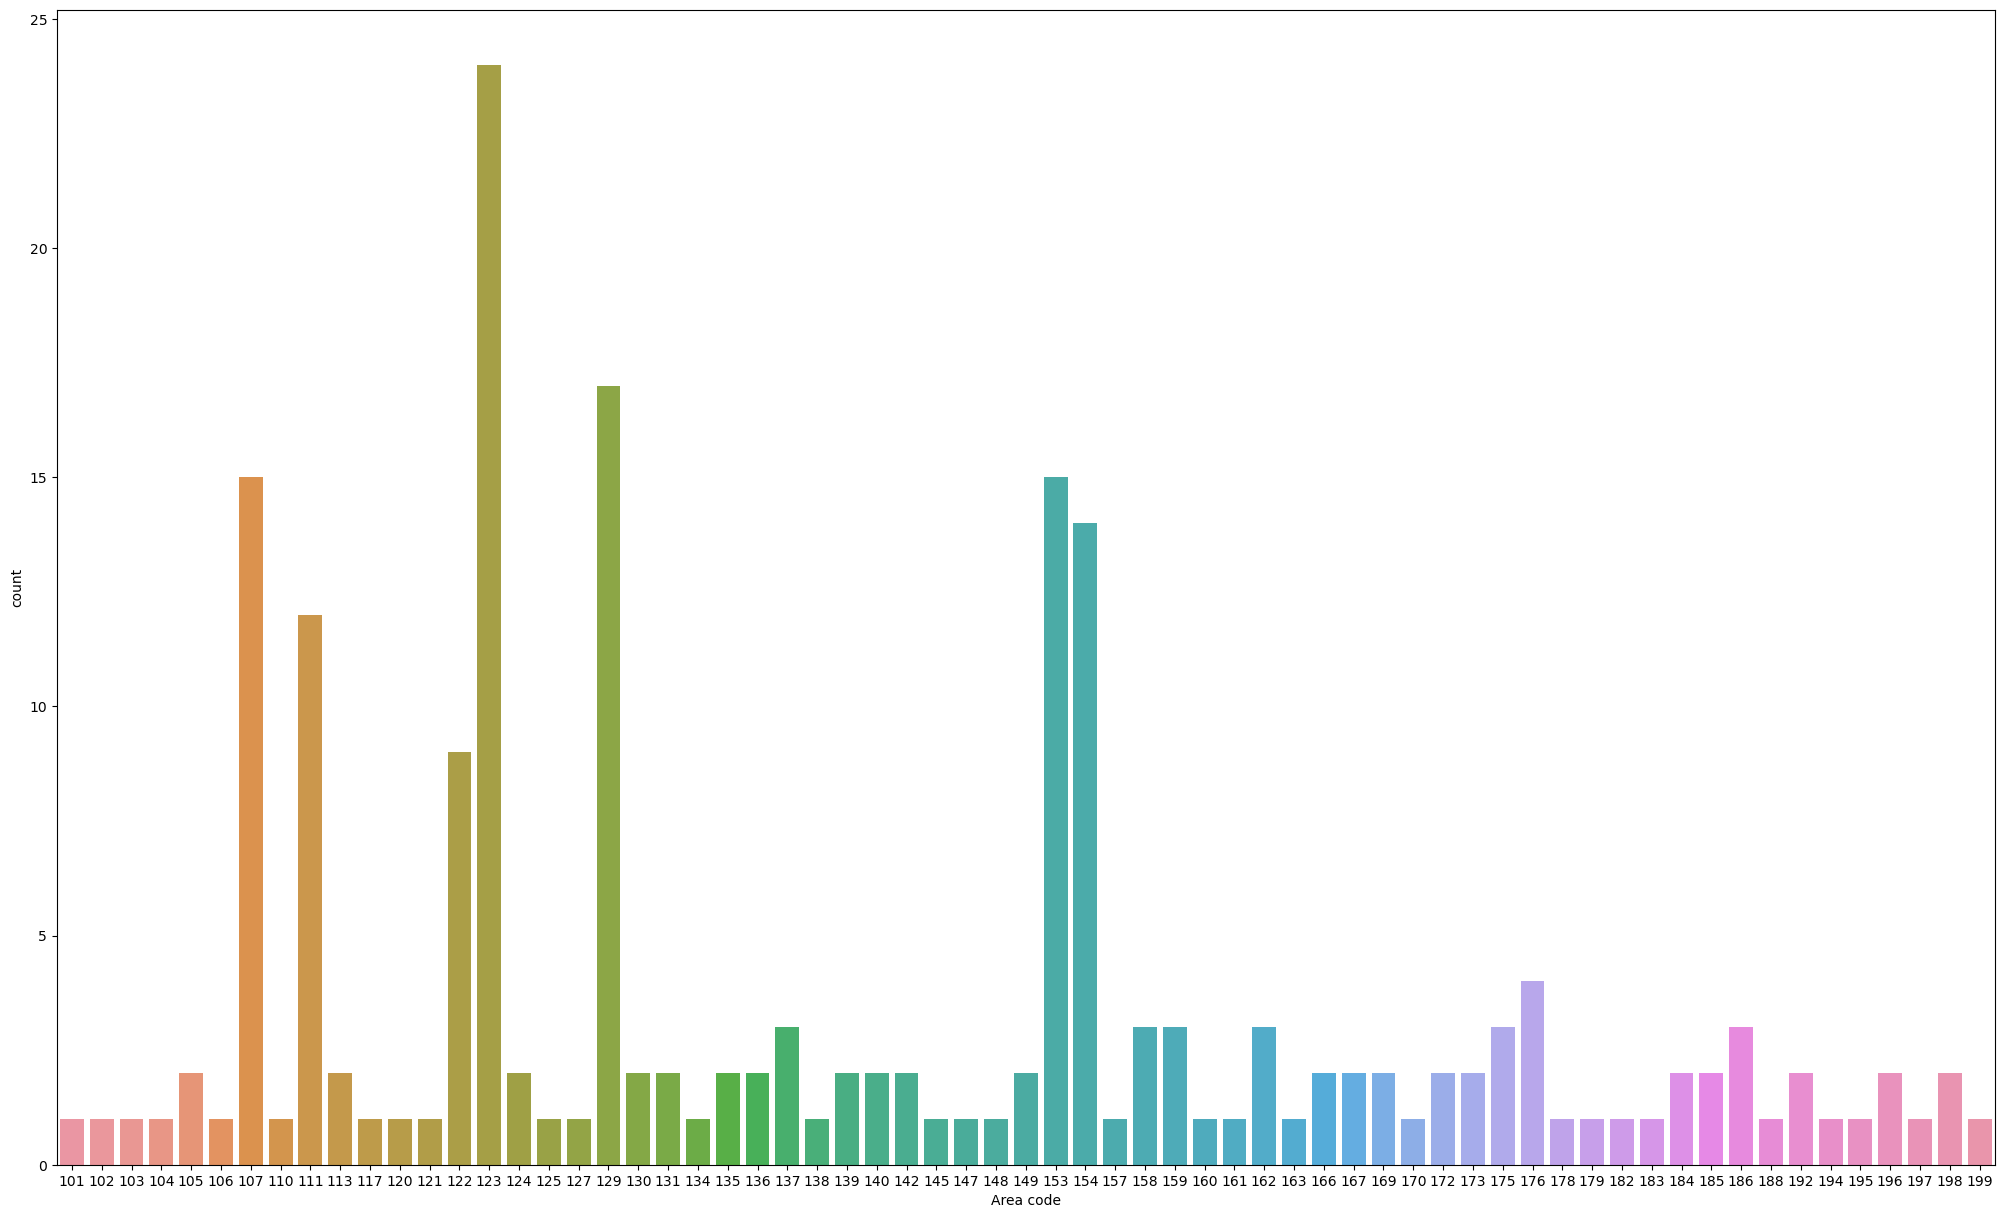

In [44]:
plt.figure(figsize=(25,15))
sns.countplot(x='Area code',data=data)

<Axes: xlabel='Area code', ylabel='Density'>

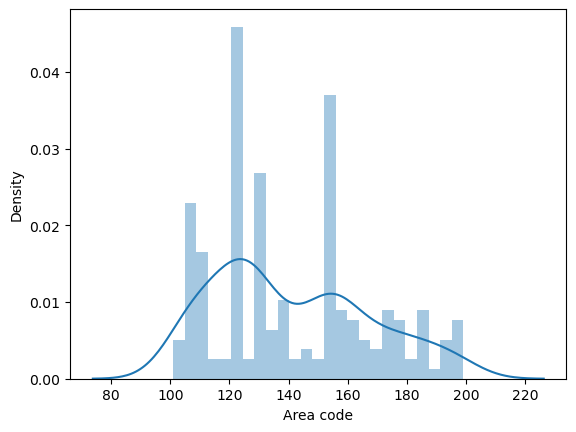

In [45]:
sns.distplot(data['Area code'], kde=True, bins=25)

<Axes: xlabel='YOB', ylabel='count'>

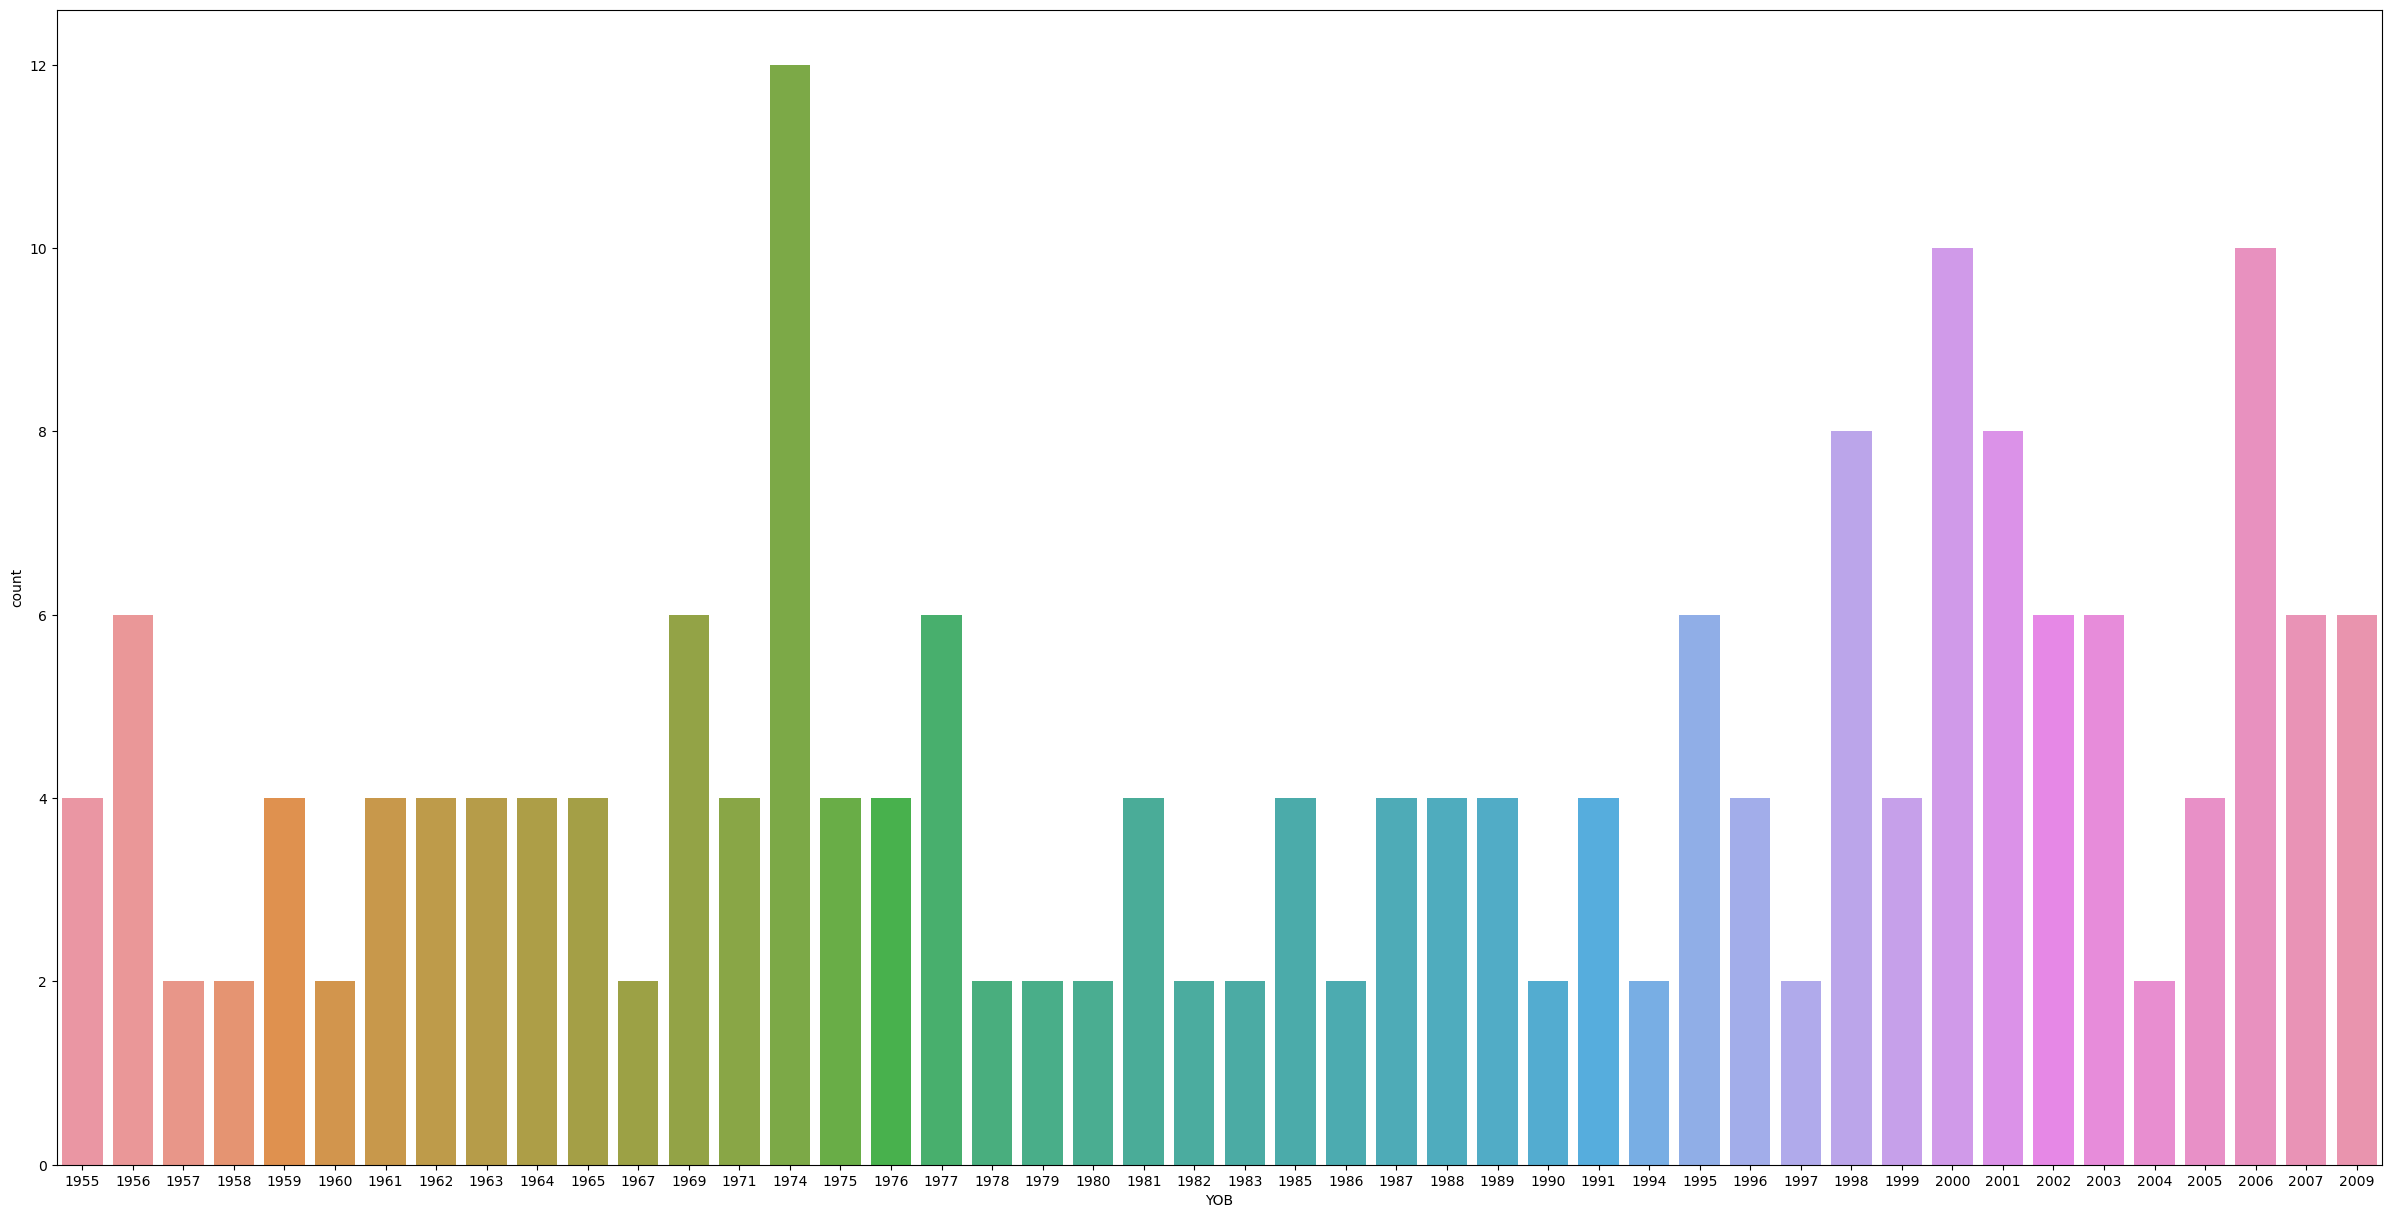

In [46]:
plt.figure(figsize=(30,15))
sns.countplot(x='YOB',data=data)

<Axes: xlabel='YOB', ylabel='Density'>

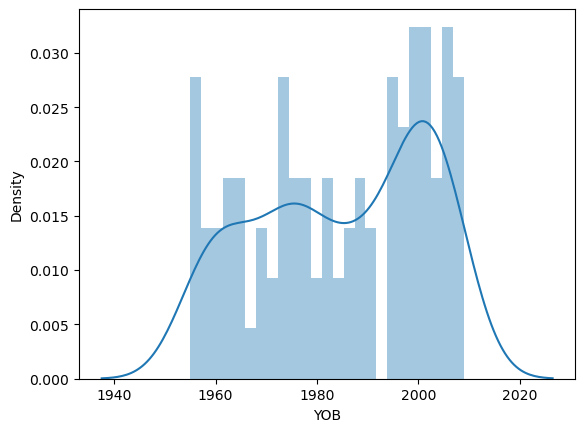

In [47]:
sns.distplot(data['YOB'], kde=True, bins=25)

<Axes: xlabel='Gender', ylabel='count'>

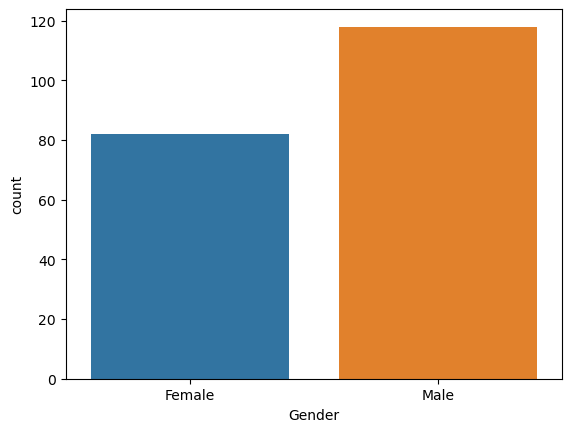

In [48]:
sns.countplot(x='Gender',data=data)

<Axes: xlabel='Marital Status', ylabel='count'>

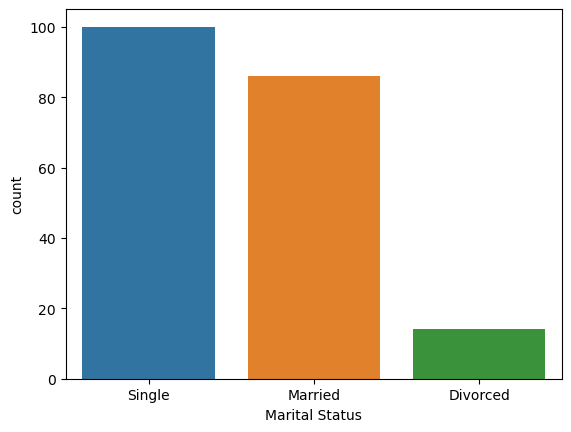

In [49]:
sns.countplot(x='Marital Status', data=data)

<Axes: xlabel='Profession', ylabel='count'>

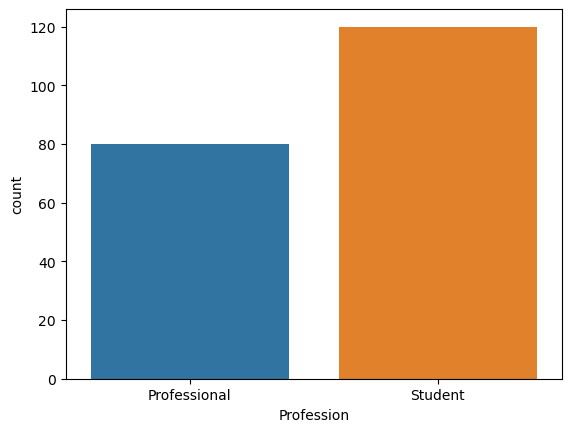

In [50]:
sns.countplot(x='Profession', data=data)

<Axes: xlabel='Budget', ylabel='count'>

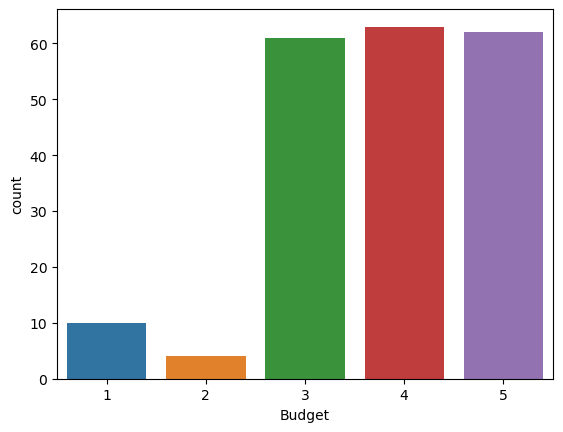

In [51]:
sns.countplot(x='Budget', data=data)

<Axes: xlabel='Cuisines', ylabel='count'>

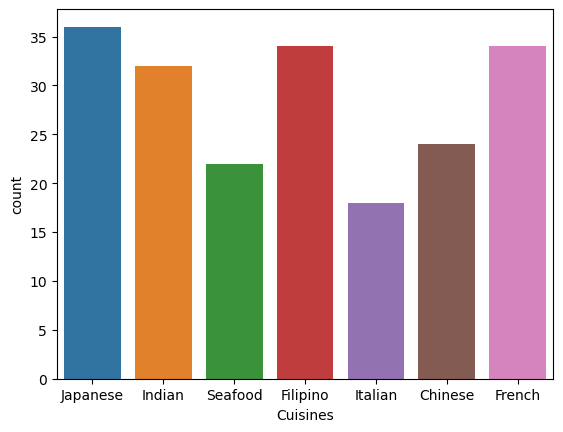

In [52]:
sns.countplot(x='Cuisines', data=data)

<Axes: xlabel='Alcohol', ylabel='count'>

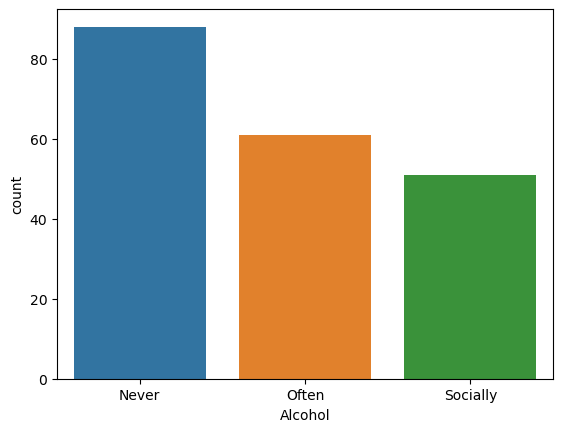

In [53]:
sns.countplot(x='Alcohol', data=data)

<Axes: xlabel='Smoker', ylabel='count'>

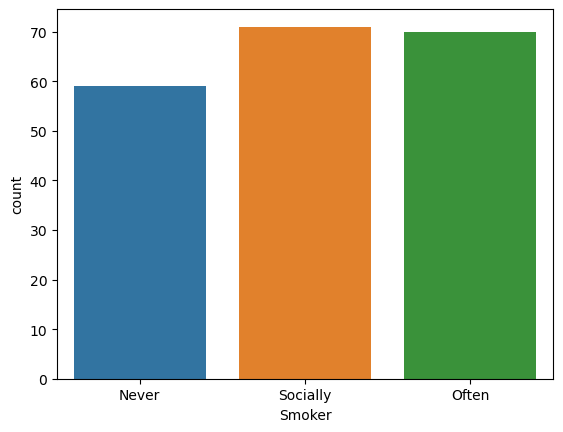

In [54]:
sns.countplot(x='Smoker', data=data)

<Axes: xlabel='Food Rating', ylabel='count'>

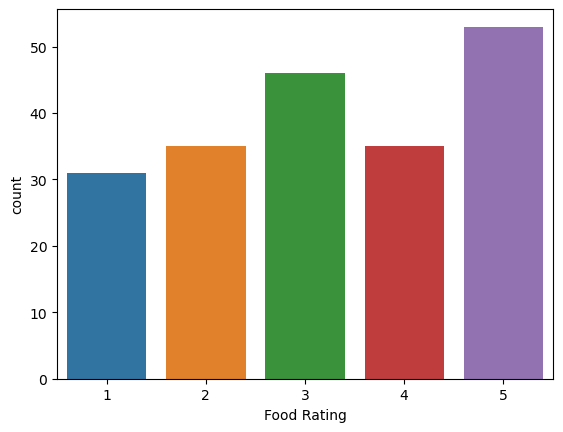

In [55]:
sns.countplot(x='Food Rating', data=data)

<Axes: xlabel='Service Rating', ylabel='count'>

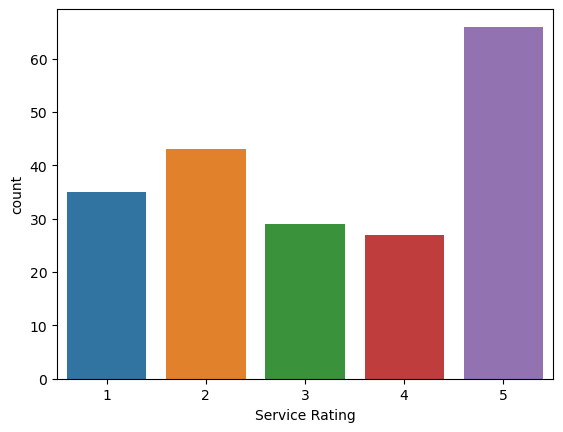

In [56]:
sns.countplot(x='Service Rating', data=data)

<Axes: xlabel='Visited Often', ylabel='count'>

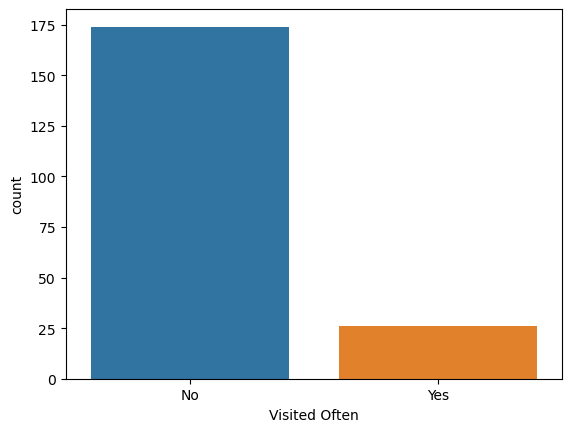

In [57]:
sns.countplot(x='Visited Often', data=data)

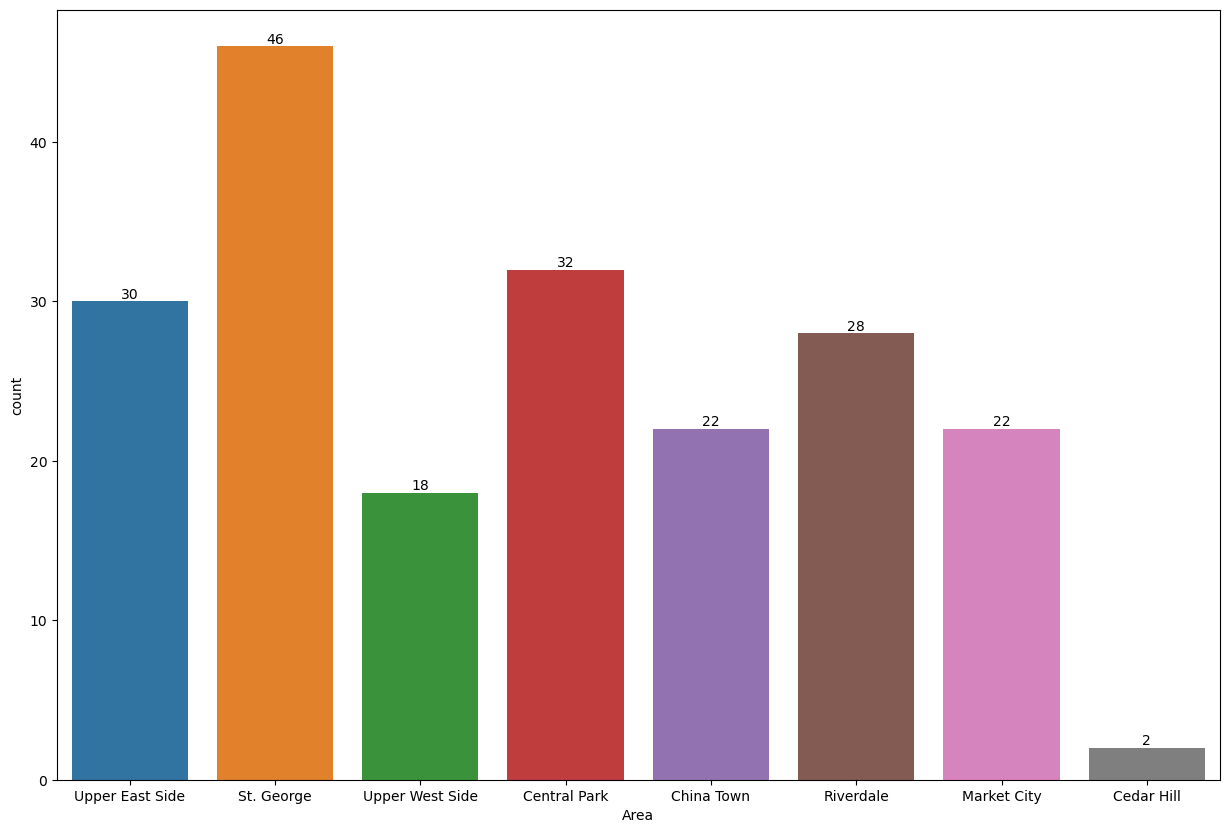

In [58]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='Area', data=data)

for i in ax.containers:
    ax.bar_label(i,)

In [59]:
area_count = data['Area'].value_counts()
area_count

Area
St. George         46
Central Park       32
Upper East Side    30
Riverdale          28
China Town         22
Market City        22
Upper West Side    18
Cedar Hill          2
Name: count, dtype: int64

In [60]:
data.columns

Index(['Area code', 'Gender', 'YOB', 'Marital Status', 'Profession', 'Budget',
       'Cuisines', 'Alcohol', 'Smoker', 'Food Rating', 'Service Rating',
       'Overall Rating', 'Visited Often', 'Area', 'City'],
      dtype='object')

<Axes: xlabel='Gender', ylabel='Budget'>

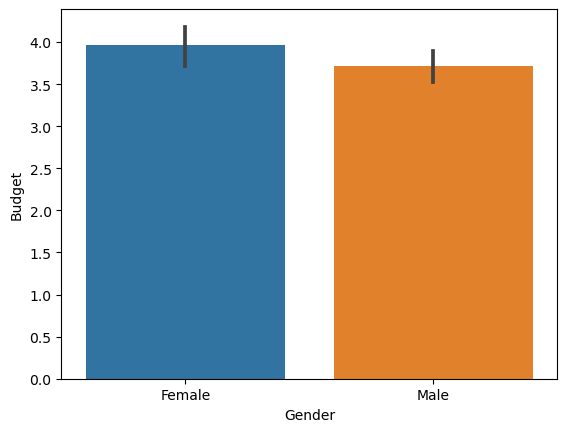

In [61]:
sns.barplot(x='Gender',y='Budget',data=data)

<Axes: xlabel='Profession', ylabel='Budget'>

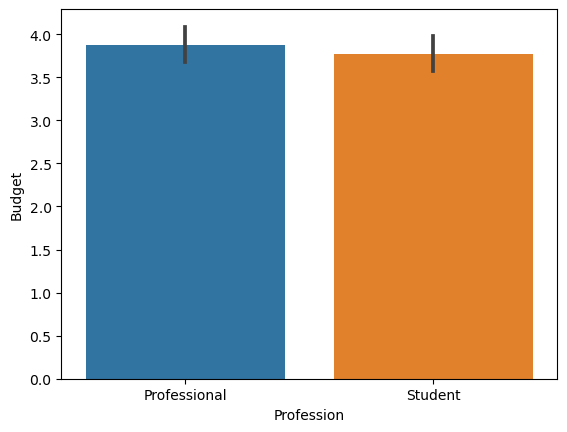

In [62]:
sns.barplot(x='Profession',y='Budget',data=data)

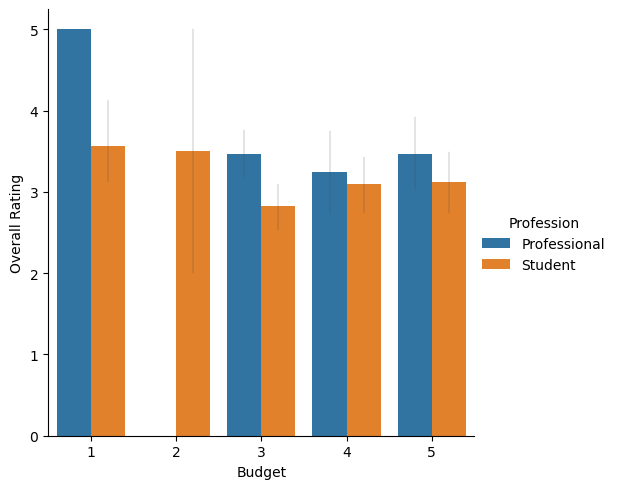

In [63]:
sns.catplot(x='Budget',y='Overall Rating',hue='Profession',data=data,kind='bar',errwidth=0.2)

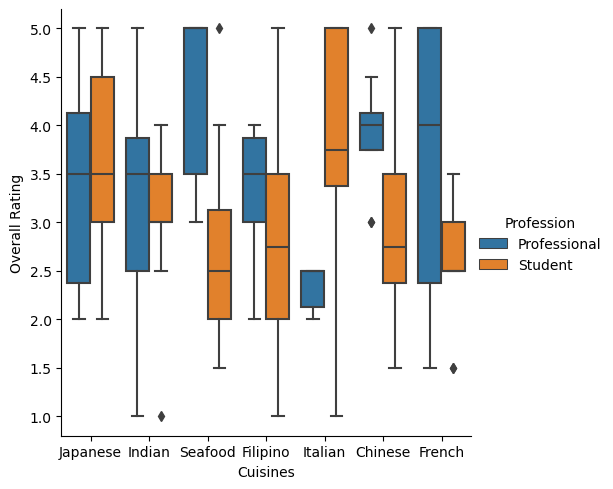

In [64]:
sns.catplot(x='Cuisines',y='Overall Rating',hue='Profession',data=data,kind='box')

In [65]:
profession_cuisine = data.groupby('Profession')['Cuisines'].value_counts()
profession_cuisine

Profession    Cuisines
Professional  Indian      18
              French      16
              Filipino    14
              Japanese    12
              Chinese      8
              Italian      6
              Seafood      6
Student       Japanese    24
              Filipino    20
              French      18
              Chinese     16
              Seafood     16
              Indian      14
              Italian     12
Name: count, dtype: int64

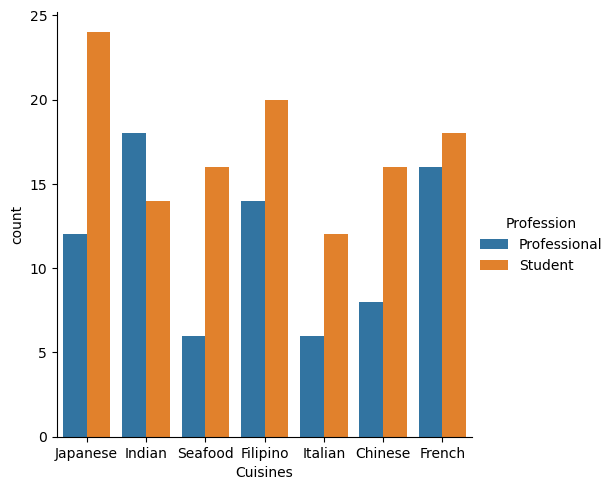

In [66]:
sns.catplot(data=data,x='Cuisines',hue='Profession',kind='count')

In [67]:
gender_profession = data.groupby('Gender')['Profession'].value_counts()
gender_profession

Gender  Profession  
Female  Student         42
        Professional    40
Male    Student         78
        Professional    40
Name: count, dtype: int64

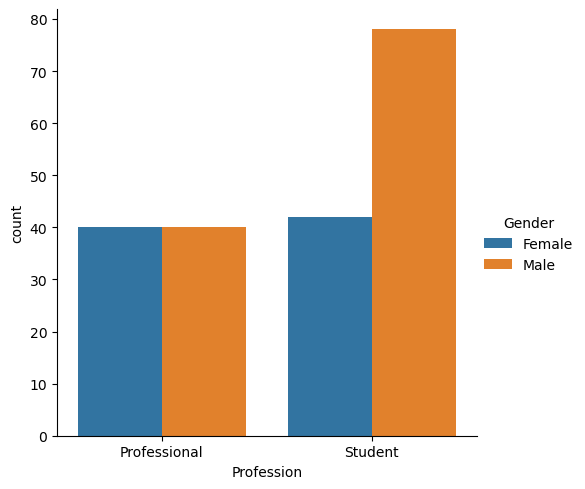

In [68]:
sns.catplot(data=data, x='Profession', hue='Gender', kind='count')

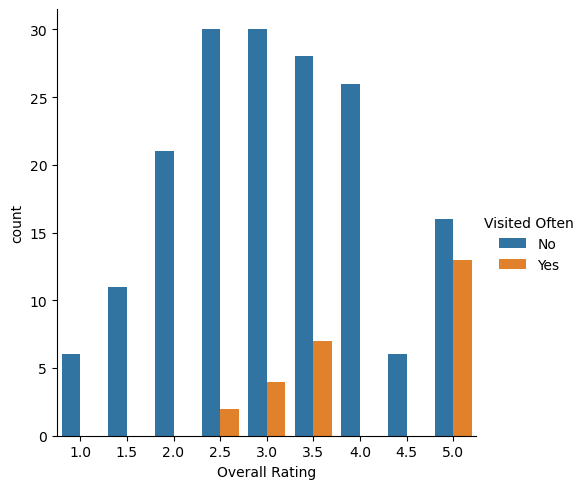

In [69]:
sns.catplot(data=data,x='Overall Rating',hue='Visited Often',kind='count')

In [70]:
profession_marital_status = data.groupby('Profession')['Marital Status'].value_counts()
profession_marital_status

Profession    Marital Status
Professional  Married           36
              Single            36
              Divorced           8
Student       Single            64
              Married           50
              Divorced           6
Name: count, dtype: int64

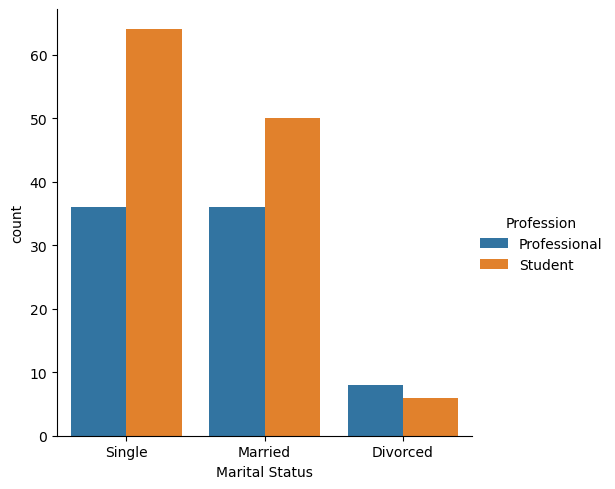

In [71]:
sns.catplot(x='Marital Status',hue='Profession', data = data, kind='count')

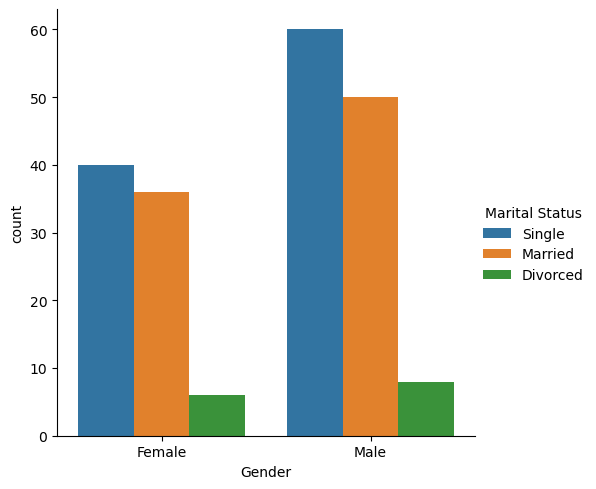

In [72]:
sns.catplot(hue='Marital Status',x='Gender', data = data, kind='count')

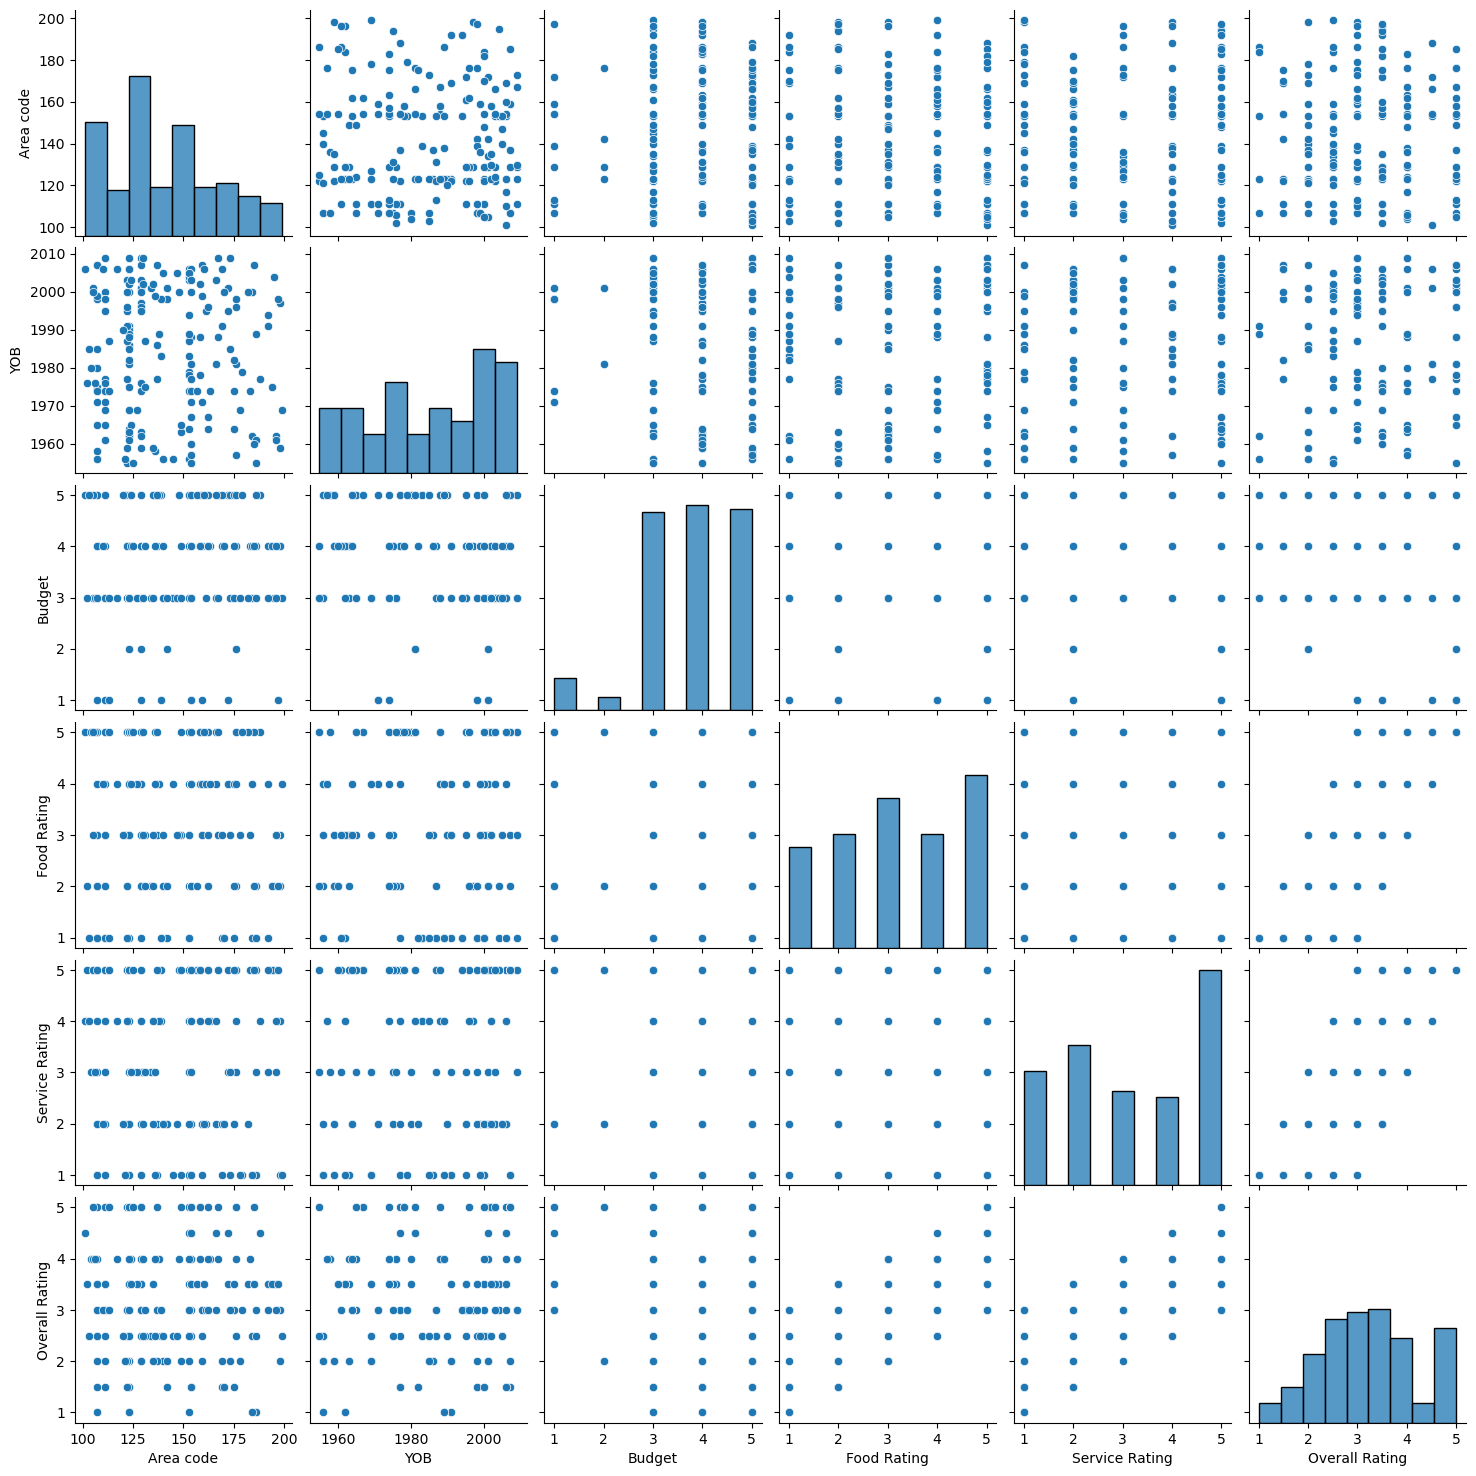

In [73]:
sns.pairplot(data)

In [74]:
data.columns

Index(['Area code', 'Gender', 'YOB', 'Marital Status', 'Profession', 'Budget',
       'Cuisines', 'Alcohol', 'Smoker', 'Food Rating', 'Service Rating',
       'Overall Rating', 'Visited Often', 'Area', 'City'],
      dtype='object')

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area code       200 non-null    int64  
 1   Gender          200 non-null    object 
 2   YOB             200 non-null    int64  
 3   Marital Status  200 non-null    object 
 4   Profession      200 non-null    object 
 5   Budget          200 non-null    int64  
 6   Cuisines        200 non-null    object 
 7   Alcohol         200 non-null    object 
 8   Smoker          200 non-null    object 
 9   Food Rating     200 non-null    int64  
 10  Service Rating  200 non-null    int64  
 11  Overall Rating  200 non-null    float64
 12  Visited Often   200 non-null    object 
 13  Area            200 non-null    object 
 14  City            200 non-null    object 
dtypes: float64(1), int64(5), object(9)
memory usage: 23.6+ KB


In [76]:
data.select_dtypes(include=['object']).columns

Index(['Gender', 'Marital Status', 'Profession', 'Cuisines', 'Alcohol',
       'Smoker', 'Visited Often', 'Area', 'City'],
      dtype='object')

In [77]:
data1 = data.copy()

In [78]:
data1 = pd.get_dummies(data=data1, columns=['Gender', 'Marital Status', 'Profession', 'Cuisines', 'Alcohol',
       'Smoker', 'Visited Often', 'Area', 'City'])

In [79]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area code                200 non-null    int64  
 1   YOB                      200 non-null    int64  
 2   Budget                   200 non-null    int64  
 3   Food Rating              200 non-null    int64  
 4   Service Rating           200 non-null    int64  
 5   Overall Rating           200 non-null    float64
 6   Gender_Female            200 non-null    bool   
 7   Gender_Male              200 non-null    bool   
 8   Marital Status_Divorced  200 non-null    bool   
 9   Marital Status_Married   200 non-null    bool   
 10  Marital Status_Single    200 non-null    bool   
 11  Profession_Professional  200 non-null    bool   
 12  Profession_Student       200 non-null    bool   
 13  Cuisines_Chinese         200 non-null    bool   
 14  Cuisines_Filipino        2

In [80]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area code                200 non-null    int64  
 1   YOB                      200 non-null    int64  
 2   Budget                   200 non-null    int64  
 3   Food Rating              200 non-null    int64  
 4   Service Rating           200 non-null    int64  
 5   Overall Rating           200 non-null    float64
 6   Gender_Female            200 non-null    bool   
 7   Gender_Male              200 non-null    bool   
 8   Marital Status_Divorced  200 non-null    bool   
 9   Marital Status_Married   200 non-null    bool   
 10  Marital Status_Single    200 non-null    bool   
 11  Profession_Professional  200 non-null    bool   
 12  Profession_Student       200 non-null    bool   
 13  Cuisines_Chinese         200 non-null    bool   
 14  Cuisines_Filipino        2

In [81]:
data1.columns

Index(['Area code', 'YOB', 'Budget', 'Food Rating', 'Service Rating',
       'Overall Rating', 'Gender_Female', 'Gender_Male',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Profession_Professional',
       'Profession_Student', 'Cuisines_Chinese', 'Cuisines_Filipino',
       'Cuisines_French', 'Cuisines_Indian', 'Cuisines_Italian',
       'Cuisines_Japanese', 'Cuisines_Seafood', 'Alcohol_Never',
       'Alcohol_Often', 'Alcohol_Socially', 'Smoker_Never', 'Smoker_Often',
       'Smoker_Socially', 'Visited Often_No', 'Visited Often_Yes',
       'Area_Cedar Hill', 'Area_Central Park', 'Area_China Town',
       'Area_Market City', 'Area_Riverdale', 'Area_St. George',
       'Area_Upper East Side', 'Area_Upper West Side', 'City_NY'],
      dtype='object')

In [82]:
data1 = data1.loc[:,['Area code', 'YOB', 'Gender_Female', 'Gender_Male',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Profession_Professional',
       'Profession_Student', 'Cuisines_Chinese', 'Cuisines_Filipino',
       'Cuisines_French', 'Cuisines_Indian', 'Cuisines_Italian',
       'Cuisines_Japanese', 'Cuisines_Seafood', 'Alcohol_Never',
       'Alcohol_Often', 'Alcohol_Socially', 'Smoker_Never', 'Smoker_Often',
       'Smoker_Socially', 'Visited Often_No', 'Visited Often_Yes',
       'Area_Cedar Hill', 'Area_Central Park', 'Area_China Town',
       'Area_Market City', 'Area_Riverdale', 'Area_St. George',
       'Area_Upper East Side', 'Area_Upper West Side',
       'City_NY', 'Budget', 'Food Rating', 'Service Rating',
       'Overall Rating']]

<Axes: >

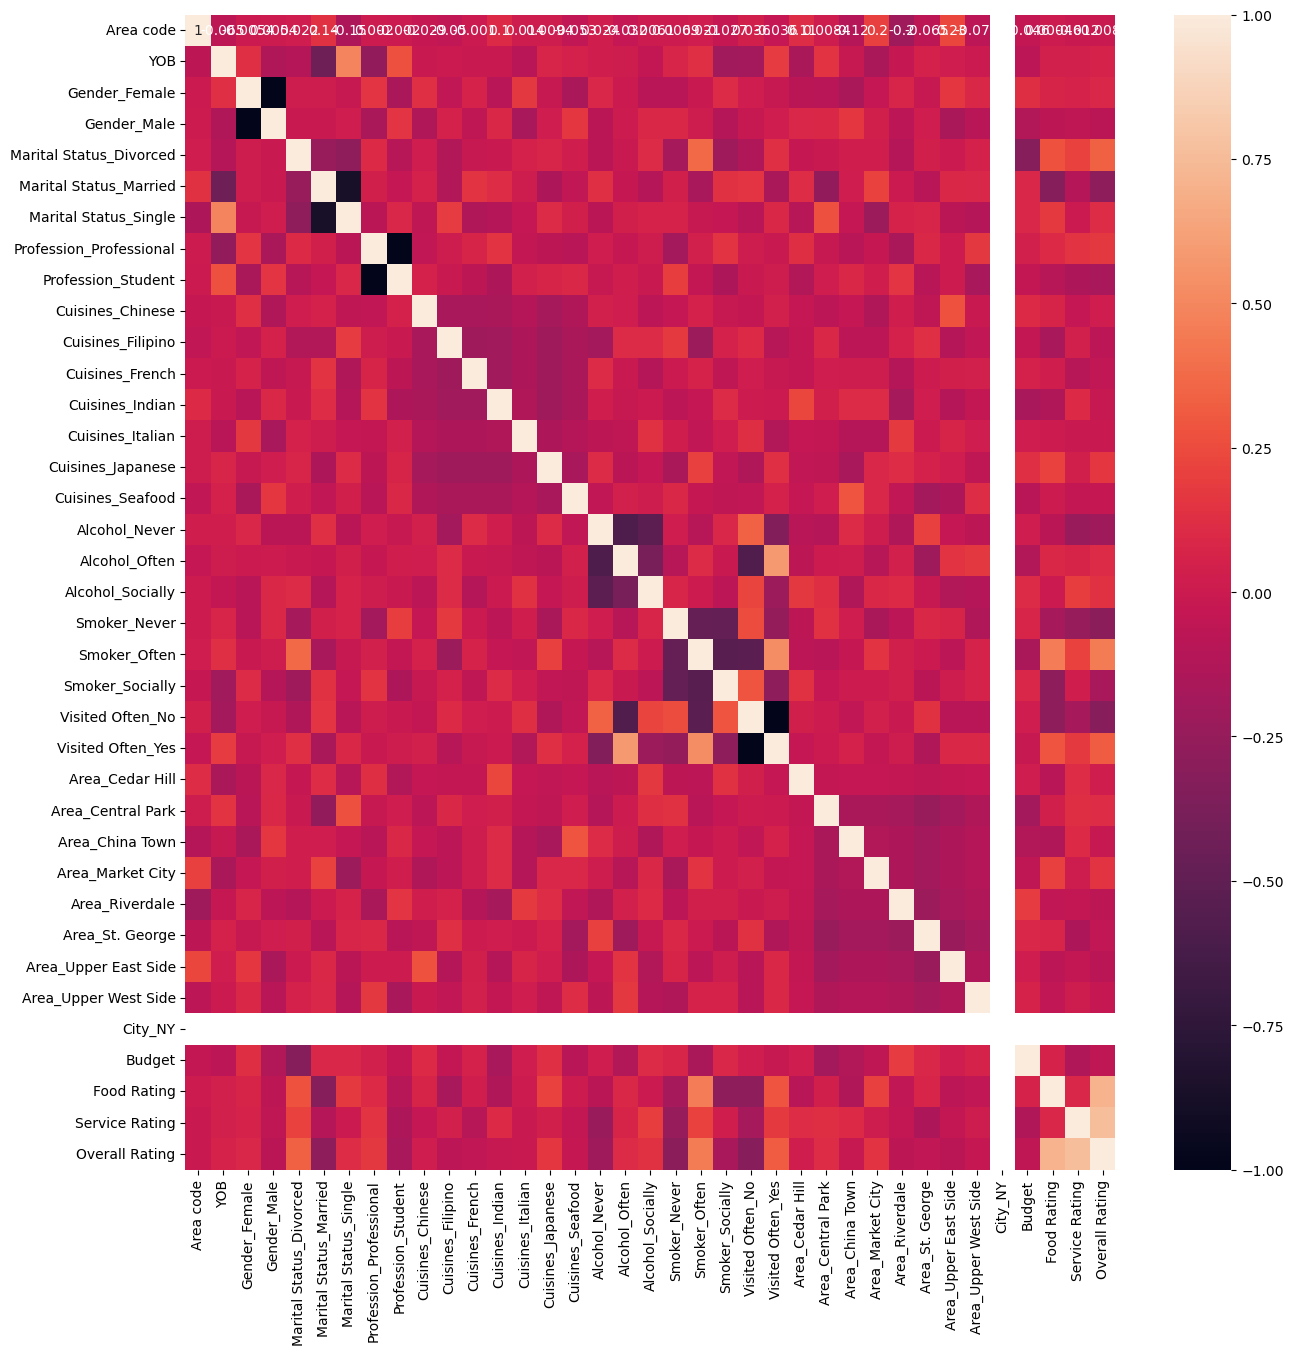

In [83]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(),annot=True,cmap=None)

In [84]:
features=data1.corr()['Overall Rating'].sort_values()
features

Visited Often_No          -0.312748
Smoker_Never              -0.293000
Marital Status_Married    -0.284672
Alcohol_Never             -0.213291
Smoker_Socially           -0.169583
Profession_Student        -0.165879
Gender_Male               -0.085445
Area_Upper East Side      -0.081280
Cuisines_Filipino         -0.076027
Area_Riverdale            -0.064237
Budget                    -0.058049
Area_St. George           -0.053517
Cuisines_French           -0.051303
Cuisines_Seafood          -0.028940
Area_Upper West Side      -0.025151
Cuisines_Indian           -0.021533
Area_China Town           -0.021520
Cuisines_Italian          -0.008924
Area code                 -0.008142
Cuisines_Chinese           0.015719
Area_Cedar Hill            0.025669
YOB                        0.057508
Gender_Female              0.085445
Alcohol_Often              0.103633
Marital Status_Single      0.111447
Area_Central Park          0.111466
Alcohol_Socially           0.133440
Area_Market City           0

<Axes: >

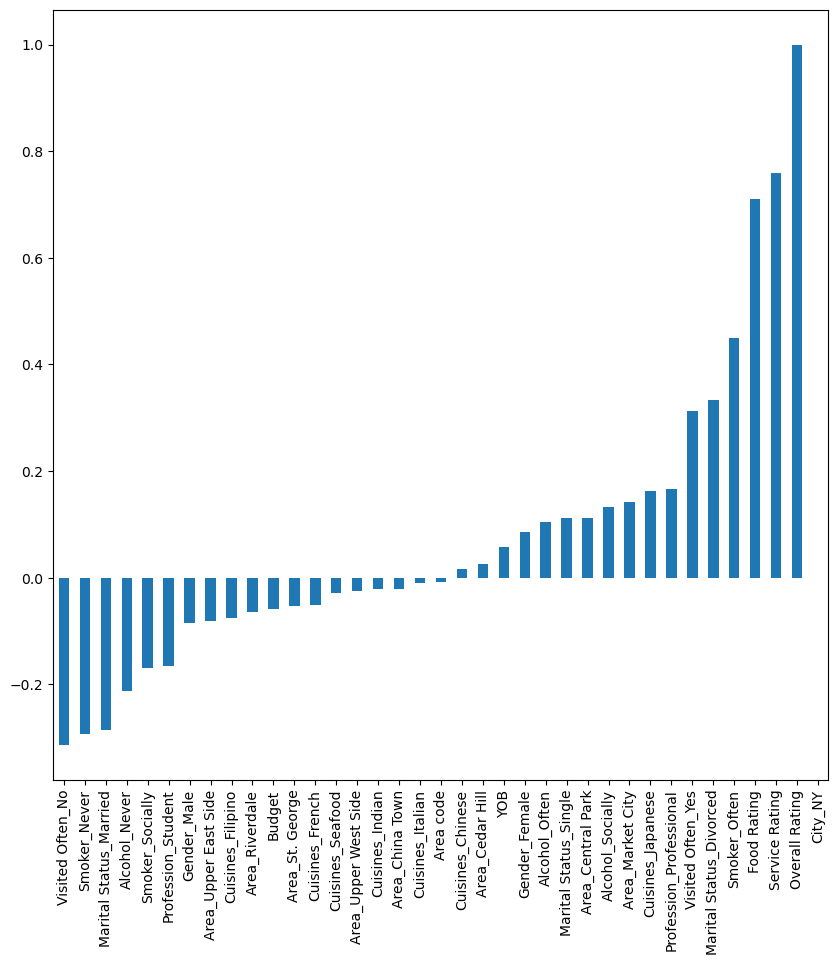

In [85]:
features.plot(kind='bar',figsize=(10,10))